# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

# Identification Information

In [1]:
# YOUR NAME              = Ahmed Mohamed
# YOUR MITX PRO USERNAME = Almekdad
# YOUR MITX PRO E-MAIL   = a7mad.mohammad@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [5]:
!pip install surprise==0.1

     |████████████████████████████████| 3.3MB 3.0MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise
You should consider upgrading via the 'pip install --upgrade pip' command.


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

In [6]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

In [7]:
%matplotlib inline


# Data

Use the [`**Dataset.load_builtin**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.Dataset.load_builtin) function to load the data.

In [8]:
data = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/nbuser/.surprise_data/ml-100k


We also want to get a sense of what the data looks like. Please create a histogram of all the ratings we have in the dataset.

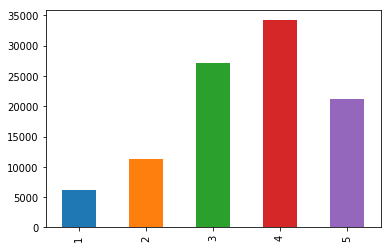

In [9]:

ratings_file = data.ratings_file

col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

ratings = raw_data.rating
ratings.value_counts().sort_index().plot.bar()

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

In [10]:
print('Number of rating: {}'.format(len(ratings)))


Number of rating: 100000


*There are 100,000 ratings in the dataset.*
*We can see from the histogram that most of the ratings is distributed around 3, 4 and 5. The number of rating 3 is about 26,000. The number of rating 4 is about 34,000. The number of rating 5 is about 21,000. The total number of rating 3, 4 and 5 is 81,000 which is about 81% of total number of ratings.
Also we can observe that the bias toward high ratings in the disturibution doesn't mean there are more 'good' moives than 'bad' moives. If we assume the rating are normally distuributed, most of the ratings should be around 2, 3 and 5. Actually, users are more likely to rate a moive they like but not to rate a moive they dislike. That's why when a moive has been rated and the rating is more often to be a high rating. * 

# Model 1: Random

In [11]:
# Create model using NormalPredictor() class
model_random = NormalPredictor()


In [12]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# See the cross_validate function that we have imported above
# http://surprise.readthedocs.io/en/stable/model_selection.html#surprise.model_selection.validation.cross_validate
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)


Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5201  1.5206  1.5106  1.5238  1.5248  1.5200  0.0050  
Fit time          0.16    0.19    0.18    0.16    0.16    0.17    0.01    
Test time         0.23    0.27    0.20    0.19    0.24    0.23    0.03    


# Model 2: User-Based Collaborative Filtering

In [13]:
# Create model using KNNBasic() class
# See the sim_options parameter to determine the user/item similarity calculation of the model
# http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
model_user = KNNBasic(sim_options={'user_based': True})


In [14]:
# Train using same cross validation code as abovemodel_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9806  0.9851  0.9771  0.9691  0.9796  0.9783  0.0053  
Fit time          0.47    0.38    0.36    0.43    0.46    0.42    0.04    
Test time         4.93    4.82    5.51    5.10    4.95    5.06    0.24    


# Model 3: Item-Based Collaborative Filtering

In [15]:
# Create model using KNNBasic() class
# Make sure you change the sim_options parameter from above
model_item = KNNBasic(sim_options={'user_based': False})


In [16]:
# Train using same cross validation code as above
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9704  0.9748  0.9677  0.9736  0.9856  0.9744  0.0061  
Fit time          0.51    0.56    0.64    0.61    0.60    0.58    0.05    
Test time         5.32    5.85    5.90    5.74    5.50    5.66    0.22    


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

*We can see from the result above that the random model gives us a RMSE (Root Mean Squred Error) of **1.5200** (mean of RMSE 5 splits). The user-based collaborative filtering gives us RMSE of **0.9783** (mean of RMSE of 5 splits). The iterm-based collaborative filtering gives us RMSE of **0.9744** (mean of RMSE of 5 splits).'
The random model has the highest RMSE which means this model performs worest. The user-based collaborative filtring and iterm-based collaborative filtering have significantly improved the result (reducing the RMSE by 0.5). The user-based collaborative filtring and iterm-based collaborative filtering perform almost the same considering their mean of RMSE and standard deviation. These two collabrative filtering model performed better because the model consider user similarity and item similarity.*

# Model 4: Matrix Factorization

In [17]:
# Create model using SVD() class
model_matrix = SVD()


In [18]:
# Train using same cross validation code as above
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9373  0.9257  0.9288  0.9383  0.9448  0.9350  0.0069  
Fit time          5.99    6.42    6.30    6.27    6.00    6.20    0.17    
Test time         0.27    0.34    0.36    0.33    0.34    0.33    0.03    


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

*The collaborative filtering models uses the similarity of user and item while the matrix factorization uses low rank matrix factorization.

The mean of RMSE of matrix factorization is **0.9350**. The result is significantly improved comparing to the random model and even better than the two collabrative filtering model. The reason is matrix factorization uses proximity to the user in the latent space.*

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [19]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Some code is required for this question.

In [20]:
# Use the function above to compute the 16 numerical values requested above

# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))


>>> k=5, model=NormalPredictor
>>> precision: 0.587
>>> reccall  : 0.343
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.769
>>> reccall  : 0.457
>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.82
>>> reccall  : 0.389
>>> k=5, model=SVD
>>> precision: 0.78
>>> reccall  : 0.429
>>> k=

|   K=5       
|------           |------|------|
|NormalPredictor: precision: 0.587, recall: 0.343 
|KNNBasic: precision: 0.769, recall: 0.457 
|KNNBasic: precision: 0.82, recall: 0.389
|SVD precision: 0.78, recall : 0.429

|   K=10       
|------           |------|------|
|NormalPredictor: precision:0.585 , recall: 0.425 
|KNNBasic: precision: 0.738, recall:0.595
|KNNBasic: precision: 0.79, recall:0.538 
|SVD precision: 0.756, recall : 0.564


*We can see above results that the random model has the lowest precision and recall in both cases of k=5 and k=10. When k = 5 all the results have low recall. For example, KNNBasic (item based) has the highest precision of 0.7 but the recall is only 0.3 When K = 5, we can see all of the recall has increased. However, the highest precision is all about 79% which become smaller.
The resulty agrees with RMSE result showing that random model has the worest performance. While item based model, user based model and matrix factorization model have much better and similar performance*

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [21]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

Hint: Use [`**Dataset.build_full_trainset**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset) to get the full trainset from the data. Then call [`**Trainset.build_anti_testset**`](http://surprise.readthedocs.io/en/stable/trainset.html#surprise.Trainset.build_anti_testset) to get the testset out. Finally, `fit` on the trainset, `test` on the testset, then pass that result to our `get_top_n` function.

In [22]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Some code is required for this question.

In [23]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f0f335fc438>, 196: [('302', 5), ('222', 5), ('274', 5), ('1184', 5), ('392', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f0f2b25db00>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f0f2b25d6a0>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f0f335fc160>, 196: [('64', 4.655912780465063), ('50', 4.653845151963737), ('474', 4.64996238844844), ('134', 4.609169130984422), ('408', 4.580544964990535)]


|   **Top 5 predictions**      
|------           |------|------|
|Random model:     |302|222|274|1184|392 
|User based model: |1189|1500|814|1536|1599 
|Item based model: |1414|1309|1310|1675|1676 
|Matrix model:     |64|50|474|134|408 

*In real-world, we could push all the recommended contents to user. Base on user's feedback on the recommended contents, we can furthermore calibrate our models to make better prediction.*



<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.